<a href="https://colab.research.google.com/github/ManaliMisra/FinalProject/blob/main/SIR_Markov_Simulation_2025_05_10_20_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 SIR Simulation with Demographics and Markov Chain
This Colab notebook simulates disease spread using Markov Chains with:
- Age-aware recovery rates
- Hotspot-based infection zones
- Animation of disease progression
- Comparison with a theoretical Markov model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulation settings
grid_size = 30
steps = 50
p_infection = 0.25
p_recovery = 0.1
p_loss_immunity = 0.01

# Initialize grid
grid = np.zeros((grid_size, grid_size), dtype=int)
center = grid_size // 2
grid[center, center] = 1  # start with one infection in the center

# Age groups: 0 = young, 1 = adult, 2 = elderly
age_grid = np.random.choice([0, 1, 2], size=(grid_size, grid_size), p=[0.3, 0.5, 0.2])

# Density map: higher infection chance in center region
density_map = np.ones((grid_size, grid_size))
density_map[10:20, 10:20] = 1.5

# SIR histories
S_history, I_history, R_history = [], [], []
S = np.sum(grid == 0)
I = np.sum(grid == 1)
R = np.sum(grid == 2)
S_history.append(S)
I_history.append(I)
R_history.append(R)

# Initial Markov chain state (normalized)
state_vector = np.array([S, I, R]) / (grid_size**2)
theory_S, theory_I, theory_R = [state_vector[0]], [state_vector[1]], [state_vector[2]]

# Transition matrix
P = np.array([
    [1 - p_infection, p_infection, 0],
    [0, 1 - p_recovery, p_recovery],
    [p_loss_immunity, 0, 1 - p_loss_immunity]
])

def update_grid(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # Susceptible
                neighbors = grid[max(0, i-1):min(grid_size, i+2),
                                 max(0, j-1):min(grid_size, j+2)]
                if np.any(neighbors == 1) and np.random.rand() < p_infection * density_map[i, j]:
                    new_grid[i, j] = 1
            elif grid[i, j] == 1:  # Infected
                age = age_grid[i, j]
                p_r = 0.2 if age == 0 else (0.1 if age == 1 else 0.05)
                if np.random.rand() < p_r:
                    new_grid[i, j] = 2
            elif grid[i, j] == 2:  # Recovered
                if np.random.rand() < p_loss_immunity:
                    new_grid[i, j] = 0
    return new_grid


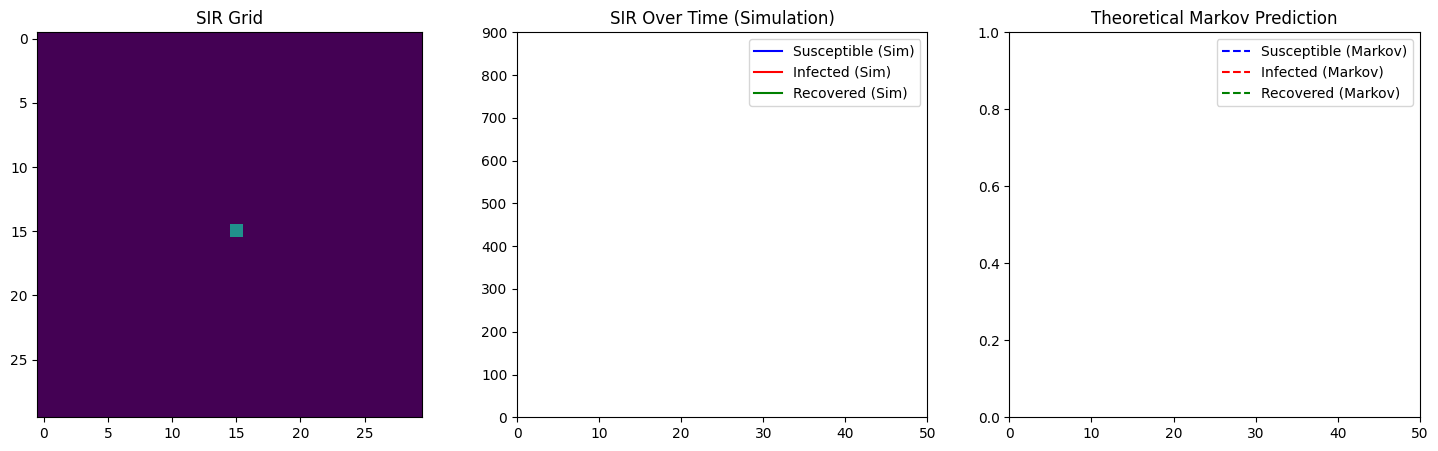

In [ ]:
# Plot setup
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Grid plot
im = ax1.imshow(grid, cmap='viridis', vmin=0, vmax=2)
ax1.set_title("SIR Grid")

# SIR line plot
line_S, = ax2.plot([], [], label='Susceptible (Sim)', color='blue')
line_I, = ax2.plot([], [], label='Infected (Sim)', color='red')
line_R, = ax2.plot([], [], label='Recovered (Sim)', color='green')
ax2.set_xlim(0, steps)
ax2.set_ylim(0, grid_size**2)
ax2.set_title("SIR Over Time (Simulation)")
ax2.legend()

# Markov comparison plot
comp_S, = ax3.plot([], [], '--', label='Susceptible (Markov)', color='blue')
comp_I, = ax3.plot([], [], '--', label='Infected (Markov)', color='red')
comp_R, = ax3.plot([], [], '--', label='Recovered (Markov)', color='green')
ax3.set_xlim(0, steps)
ax3.set_ylim(0, 1)
ax3.set_title("Theoretical Markov Prediction")
ax3.legend()


In [1]:
def animate(frame):
    global grid
    grid = update_grid(grid)
    im.set_data(grid)

    S = np.sum(grid == 0)
    I = np.sum(grid == 1)
    R = np.sum(grid == 2)

    S_history.append(S)
    I_history.append(I)
    R_history.append(R)

    x = range(len(S_history))
    line_S.set_data(x, S_history)
    line_I.set_data(x, I_history)
    line_R.set_data(x, R_history)

    # Markov prediction step
    last_state = np.array([theory_S[-1], theory_I[-1], theory_R[-1]])
    next_state = last_state @ P
    theory_S.append(next_state[0])
    theory_I.append(next_state[1])
    theory_R.append(next_state[2])

    x = range(len(theory_S))
    comp_S.set_data(x, theory_S)
    comp_I.set_data(x, theory_I)
    comp_R.set_data(x, theory_R)

    return im, line_S, line_I, line_R, comp_S, comp_I, comp_R

anim = FuncAnimation(fig, animate, frames=steps, interval=300, blit=True)
plt.tight_layout()
plt.show()


NameError: name 'FuncAnimation' is not defined